In [1]:
# mpl_toolkits.mplot3d.axes3d.Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# import gdal
import os
import sys
from osgeo import gdal
# load tif file with gdal

In [2]:
# read tif file
file_dir = './elevation file/esjan clipped.tif'

# read tif file
ds = gdal.Open(file_dir)

In [13]:
# turn tif file to array
data = ds.ReadAsArray()

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)

In [4]:
# mpl_toolkits.mplot3d.axes3d.Axes3D

In [5]:
# # 3d plot  
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# X = np.arange(0, data.shape[1], 1)
# Y = np.arange(0, data.shape[0], 1)
# X, Y = np.meshgrid(X, Y)
# Z = data

# # filter out values below 0
# Z[Z < 0] = 0
# X[Z < 0] = 0
# Y[Z < 0] = 0
 
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# plt.show()


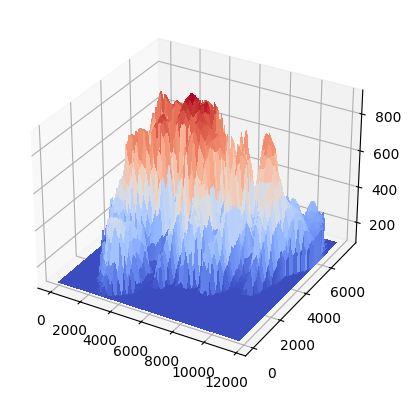

In [15]:
# 3d plot interactive 
# %matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(0, data.shape[1], 1)
Y = np.arange(0, data.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = data


# filter out values below 0
Z[Z < 100] = 100
X[Z < 100] = 100
Y[Z < 100] = 100
 
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()
 
     

In [19]:
# save data to tif again with original projection
driver = gdal.GetDriverByName('GTiff')
outdata = driver.Create('./elevation file/esjan clipped 3d.tif', data.shape[1], data.shape[0], 1, gdal.GDT_Float32)
outdata.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outdata.SetProjection(ds.GetProjection())##sets same projection as input
outdata.GetRasterBand(1).WriteArray(Z)
outdata.FlushCache() ##saves to disk!!
outdata = None
 

In [7]:
# save data to txt
np.savetxt( "data.txt", data, fmt='%d', delimiter=",")

In [8]:
# load data with full path
full_path = 'D:/Google Drive/Verkefni/3D prenta esjuna/data.txt'
data = np.loadtxt(full_path, delimiter=',')

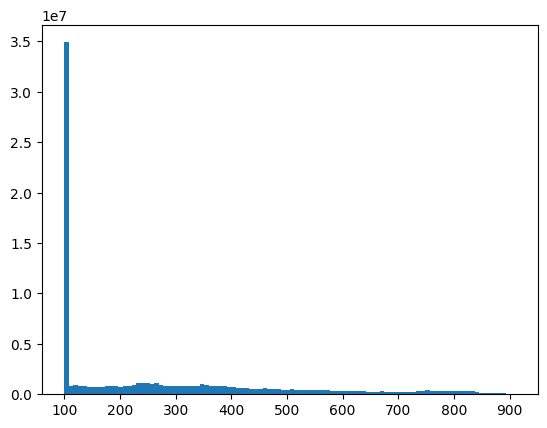

In [11]:
plt.hist(data.ravel(),bins = 100)
plt.show()

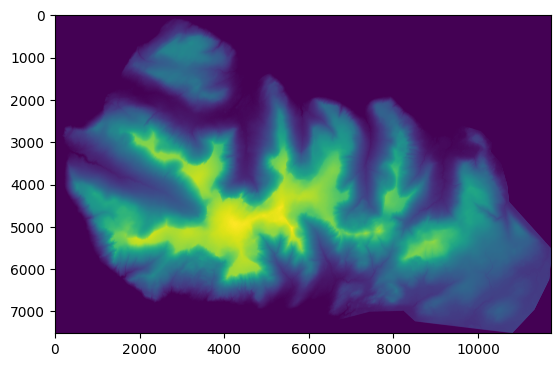

In [10]:
plt.imshow(data)
plt.show()